# **Performing K-Fold Validation and Holdout Validation on Large Dataset with Multiclass Classification**

## We will build a model that predicts what types of trees grow in an area based on the surrounding characteristics and evaluate that model with K-Fold validation and Holdout Validation to generate insights

In [0]:
# import all necessary libraries

from timeit import default_timer as timer
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [0]:
# upload dataset from kaggle

from google.colab import files
uploaded = files.upload()

Saving covtype.csv to covtype.csv


In [0]:
# initialize data frame

df = pd.read_csv("covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
# check the type of our Y variable to avoid future imputations

df['Cover_Type'].dtype

dtype('float64')

In [0]:
df.tail()

# that's a lot of rows!

NameError: ignored

In [0]:
# notice that we use all features of our dataset so that we can illustrate how taxing cross validation will be

X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']

In [0]:
# some nan values happen to sneak into our dataset so we will fill them up

X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

## Initialize our ML algorithm

In [0]:
# use a K-nearest neighbhors machine learning algorithm

neigh = KNeighborsClassifier(n_neighbors=5)

## **K-Fold Validation**

In [0]:
# only with 200 folds are we able to generate an accuracy of 80%

neigh.fit(X,y)
kFoldStart = time.time()
y_pred = cross_val_predict(neigh, X, y, cv = 200)
kFoldEnd = time.time()
kFoldTime = kFoldEnd - kFoldStart
print("K Fold Validation Accuracy is ", accuracy_score(y, y_pred))

K Fold Validation Accuracy is  0.8016822371999202


In [0]:
# it takes 16 minutes to run the K-Fold cross validation!!!!

print("K-Fold Validation takes ", kFoldTime, "seconds")

K-Fold Validation takes  1001.0495188236237 seconds


[[166004  46040     27      0    243     43   1902]
 [ 41396 225886   1919      4   1808   1156    293]
 [    59   3704  31832    442    143   1591      0]
 [     0      7    267   2119      0    124      0]
 [   539   4504    208      0   7251     68      5]
 [    50   2434   1501    182     44  14385      0]
 [  3792    726      0      0      4      0  18310]]


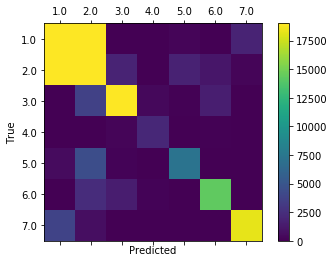

In [0]:
# generate a heatmap of a confusion matrix with predicted and true values of the type of trees

labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
cm = confusion_matrix(y_pred, y, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, vmin=0, vmax=19000)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **Holdout Validation**

In [0]:
# split our dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [0]:
# some nan values happen to sneak into our dataset so we will fill them up

X_train = X_train.fillna(method='ffill')
y_train = y_train.fillna(method='ffill')

In [0]:
# run the holdout validation and make predictions
# it takes only 30 seconds for a normal validation which is still pretty long

neigh.fit(X_train, y_train)
holdOutStart = time.time()
holdOutPredictions = neigh.predict(X_test)
holdOutEnd = time.time()
holdOutTime = holdOutEnd - holdOutStart
print("Hold Out Validation takes ", holdOutTime, " seconds")

Hold Out Validation takes  32.088762044906616  seconds


In [0]:
print(accuracy_score(y_test, holdOutPredictions))

# notice how much more accurate the holdout validation is compared to the k-fold cross validation

0.9661281439324398


[[61175  1789     3     0    29     3   175]
 [ 2007 82794   128     3   292   139    30]
 [    4   127 10483   129    31   214     0]
 [    0     1    42   640     0    23     0]
 [   26   183    10     0  2510     7     2]
 [    7    90   156    57     8  4863     0]
 [  180     9     0     0     0     0  5935]]


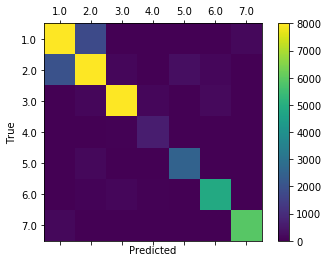

In [0]:
# generate a heatmap of a confusion matrix with predicted and true values of the type of trees

labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
cm = confusion_matrix(holdOutPredictions, y_test, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, vmin=0, vmax=8000)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()